In [1]:
import numpy as np

a = np.array([1, 2, 4, 3, 8])
print(a.size)
print(a[0], a[1], a[2], a[-1])

5
1 2 4 8


In [2]:
import numpy as np

A = np.array([[1, 2, 3], [4, 5, 6]])
print(A)
print(A.size)
print(A.shape)
print(A[0,0], A[0,1], A[1,1])
print(A[1,:])
print(A[:,1])

[[1 2 3]
 [4 5 6]]
6
(2, 3)
1 2 5
[4 5 6]
[2 5]


In [3]:
import numpy as np

B = np.arange(16).reshape((2, 2, 4))
print(B)
print(B.size)
print(B.shape)
print(B[0,0,0], B[0,0,1], B[0,1,1])
print(B[0,1,:])

[[[ 0  1  2  3]
  [ 4  5  6  7]]

 [[ 8  9 10 11]
  [12 13 14 15]]]
16
(2, 2, 4)
0 1 5
[4 5 6 7]


In [4]:
import numpy as np

C = np.array([[1,2,3], [4,5,6]])
D = C.T
print(C)
print(D)

[[1 2 3]
 [4 5 6]]
[[1 4]
 [2 5]
 [3 6]]


In [5]:
import numpy as np

C = np.array([[1,2,3], [4,5,6]])
b = np.array([10,20,30])
D = C + b
print(D)

[[11 22 33]
 [14 25 36]]


In [1]:
#计算向量的范数

import numpy as np
import numpy.linalg as LA #导入Numpy中线性代数库

x = np.arange(0,1,0.1)
print(x)

x1 = LA.norm(x, 1) #计算1范数
x2 = LA.norm(x, 2) #计算2范数
xa = LA.norm(x, np.inf) #计算无穷范数
print(x1)
print(x2)
print(xa)

[0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9]
4.500000000000001
1.6881943016134133
0.9


In [2]:
#特征值分解

import numpy as np

a = np.array([[1,2],[3,4]]) #示例矩阵
A1 = np.linalg.eigvals(a) #得到特征值
A2,V1 = np.linalg.eig(a) #其中A2也是特征值，V1为特征向量
print(A1)
print(A2)
print(V1)

#在numpy.linalg模块中：
#eigvals()：计算矩阵的特征值
#eig()：返回包含特征值和对应特征向量的元组

[-0.37228132  5.37228132]
[-0.37228132  5.37228132]
[[-0.82456484 -0.41597356]
 [ 0.56576746 -0.90937671]]


In [4]:
#SVD奇异值分解

import numpy as np

Data = np.mat([[1,1,1,0,0],
               [2,2,2,0,0],
               [3,3,3,0,0],
               [5,5,3,2,2],
               [0,0,0,3,3],
               [0,0,0,6,6]])

u,sigma,vt = np.linalg.svd(Data)
print(sigma)
#转换为对角矩阵
diagv = np.mat([[sigma[0],0,0],[0,sigma[1],0],[0,0,sigma[2]]])
print(diagv)

[1.09824632e+01 8.79229347e+00 1.03974857e+00 1.41050174e-15
 1.80635171e-32]
[[10.98246322  0.          0.        ]
 [ 0.          8.79229347  0.        ]
 [ 0.          0.          1.03974857]]


In [5]:
#迹运算

C = np.array([[1,2,3],[4,5,6],[7,8,9]])
TrC = np.trace(C)

D = C - 2
TrCT = np.trace(C.T)
TrCD = np.trace(np.dot(C,D))
TrDC = np.trace(np.dot(D,C))
print(TrC)
print(TrCT)
print(TrCD)
print(TrDC)

15
15
171
171


In [16]:
from sklearn.datasets import load_iris
import numpy as np
from numpy.linalg import eig

#Standardize by remove average
def pca(X, k):
    X = X - X.mean(axis=0)
    
    #Calculate covariance matrix:
    x_cov = np.cov(X.T, ddof=0)
    
    #Calculate eigenvalues and eigenvectors of covariance matrix
    eigenvalues, eigenvetors = eig(x_cov)
    
    #top k large eigenvetors
    klarge_index = eigenvalues.argsort()[-k:][::-1]
    k_eigenvectors = eigenvetors[klarge_index]
    
    return np.dot(X, k_eigenvectors.T)

iris = load_iris()
X = iris.data
k = 2 #选取贡献最大的前2个特征值

x_pca = pca(X, k)

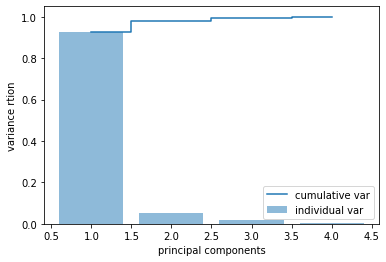

In [14]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from numpy.linalg import eig

iris = load_iris()
X = iris.data
X = X - X.mean(axis=0)

#计算协方差矩阵
X_cov = np.cov(X.T, ddof=0)

#计算协方差矩阵的特征值和特征向量
eigenvalues, eigenvectors = eig(X_cov)

tot = sum(eigenvalues)
var_exp = [(i / tot) for i in sorted(eigenvalues, reverse=True)]
cum_var_exp = np.cumsum(var_exp)
plt.bar(range(1,5), var_exp, alpha=0.5, align='center', label='individual var')
plt.step(range(1,5), cum_var_exp, where='mid', label='cumulative var')
plt.ylabel('variance rtion')
plt.xlabel('principal components')
plt.legend(loc='best')
plt.show()